In [1]:
import seaborn as sns;

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

from util import read

In [3]:
traces = read()
print(traces.shape)

N: 10000
L: 6100
(10000, 6100)


[26, 27, 28, 53, 54, 55, 80, 81, 82, 91, 92, 93, 102, 103, 104, 155, 157, 166]


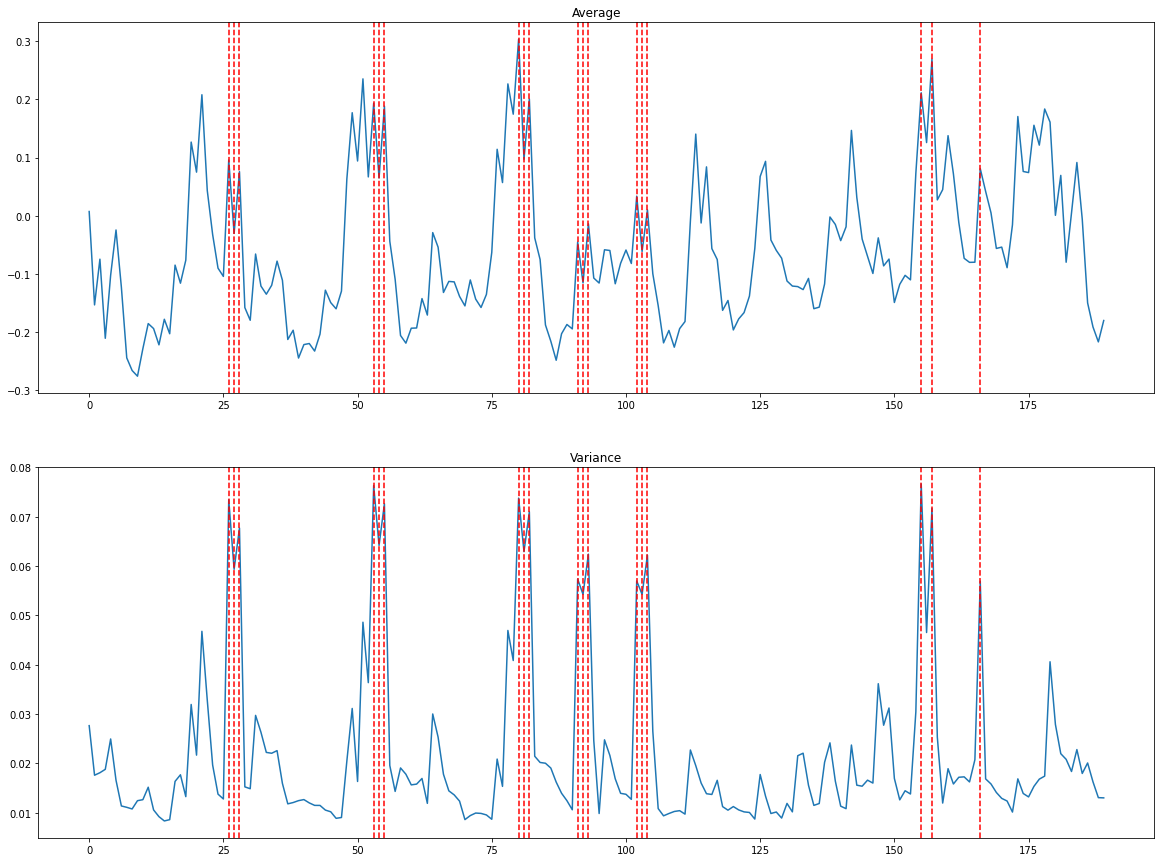

In [48]:
segL, segR = 180, 370
# segL, segR = 1565+219, 1565+397
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[segL:segR])
sig = traces[:, segL:segR]
var = np.std(sig, ddof=1, axis=0)
var_index = np.argsort(var)[::-1]
print(sorted(var_index[:18]))
for i in var_index[:18]:
    plt.axvline(i, color='r', linestyle='--')

plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[segL:segR])
for i in var_index[:18]:
    plt.axvline(i, color='r', linestyle='--')

plt.show()

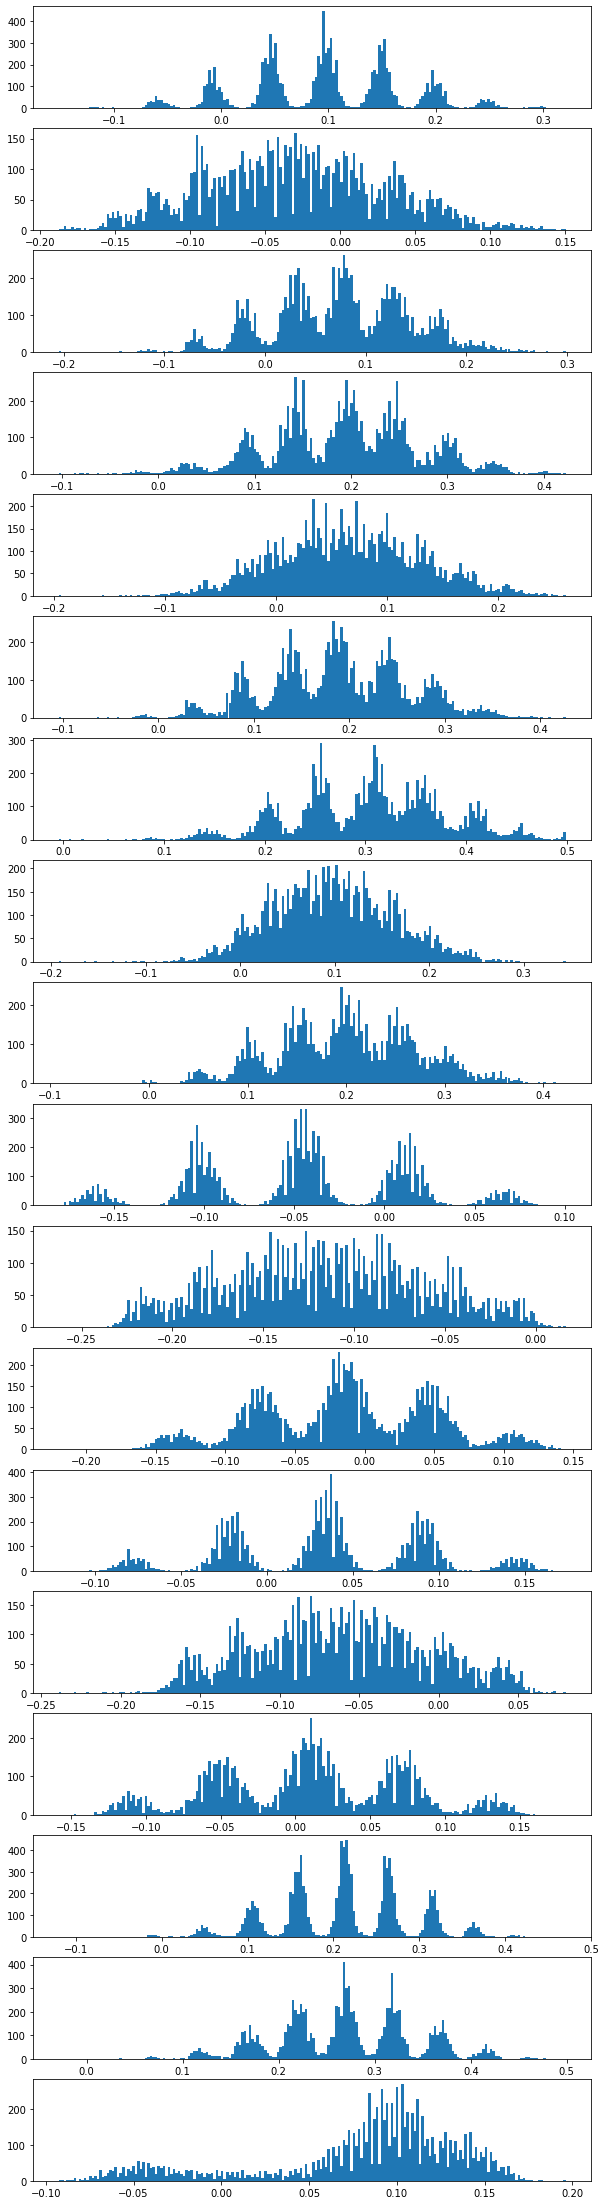

<AxesSubplot:>

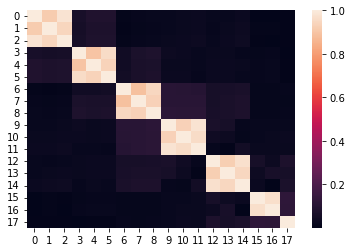

In [49]:
peaks = sorted(var_index[:18])
plt.figure(figsize=(10, 40))
for i, idx in enumerate(peaks):
    plt.subplot(18, 1, i+1)
    plt.hist(sig[:, idx], bins=200)
plt.show()
sns.heatmap(np.abs(np.corrcoef(sig.T[peaks])))

In [24]:
np.corrcoef(traces.T[[43, 44, 45]])

array([[ 1.        ,  0.72600396, -0.16664613],
       [ 0.72600396,  1.        ,  0.27947463],
       [-0.16664613,  0.27947463,  1.        ]])

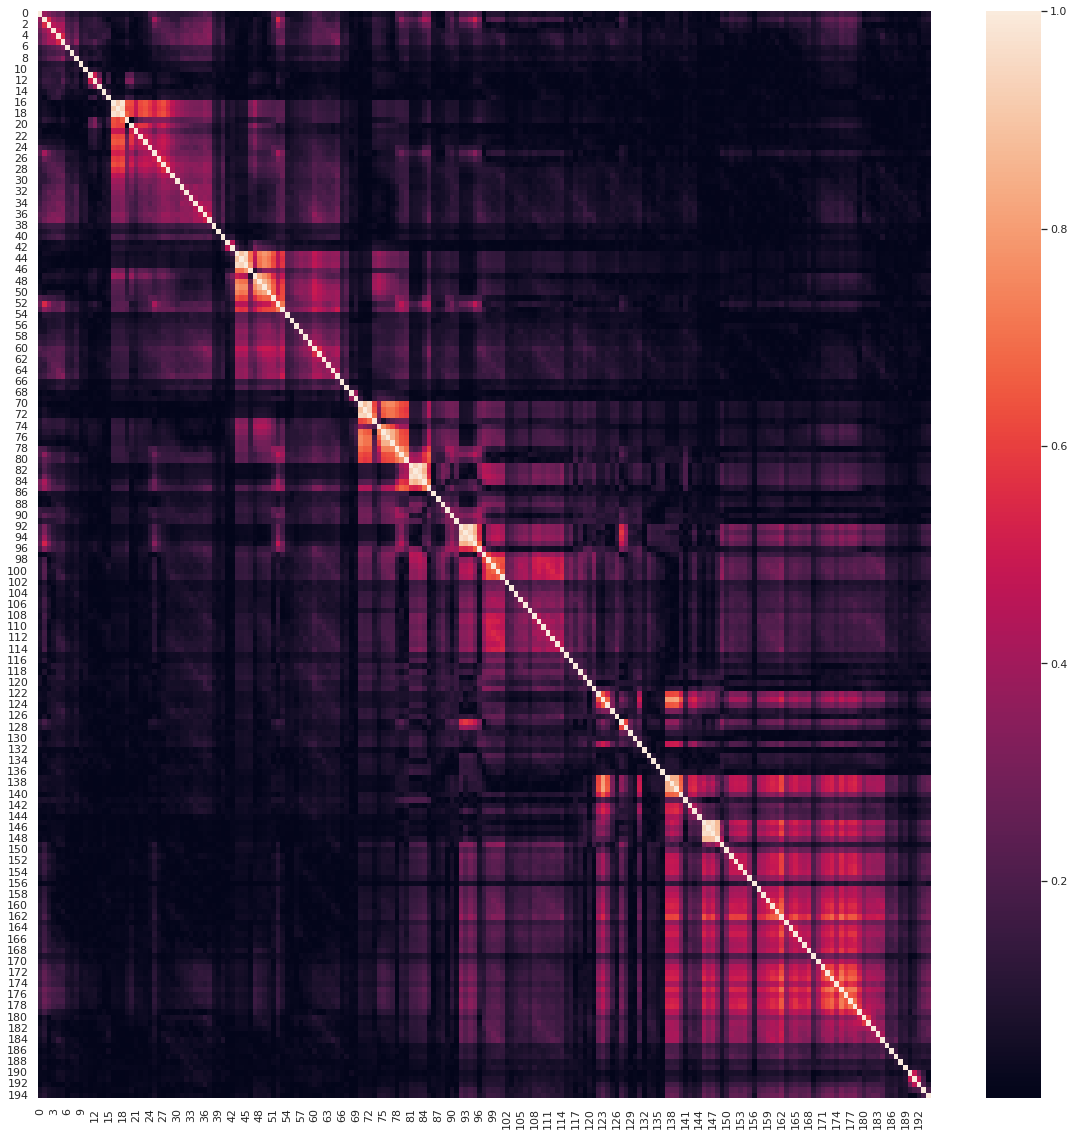

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(np.corrcoef(traces.T[190:385])))
plt.show()

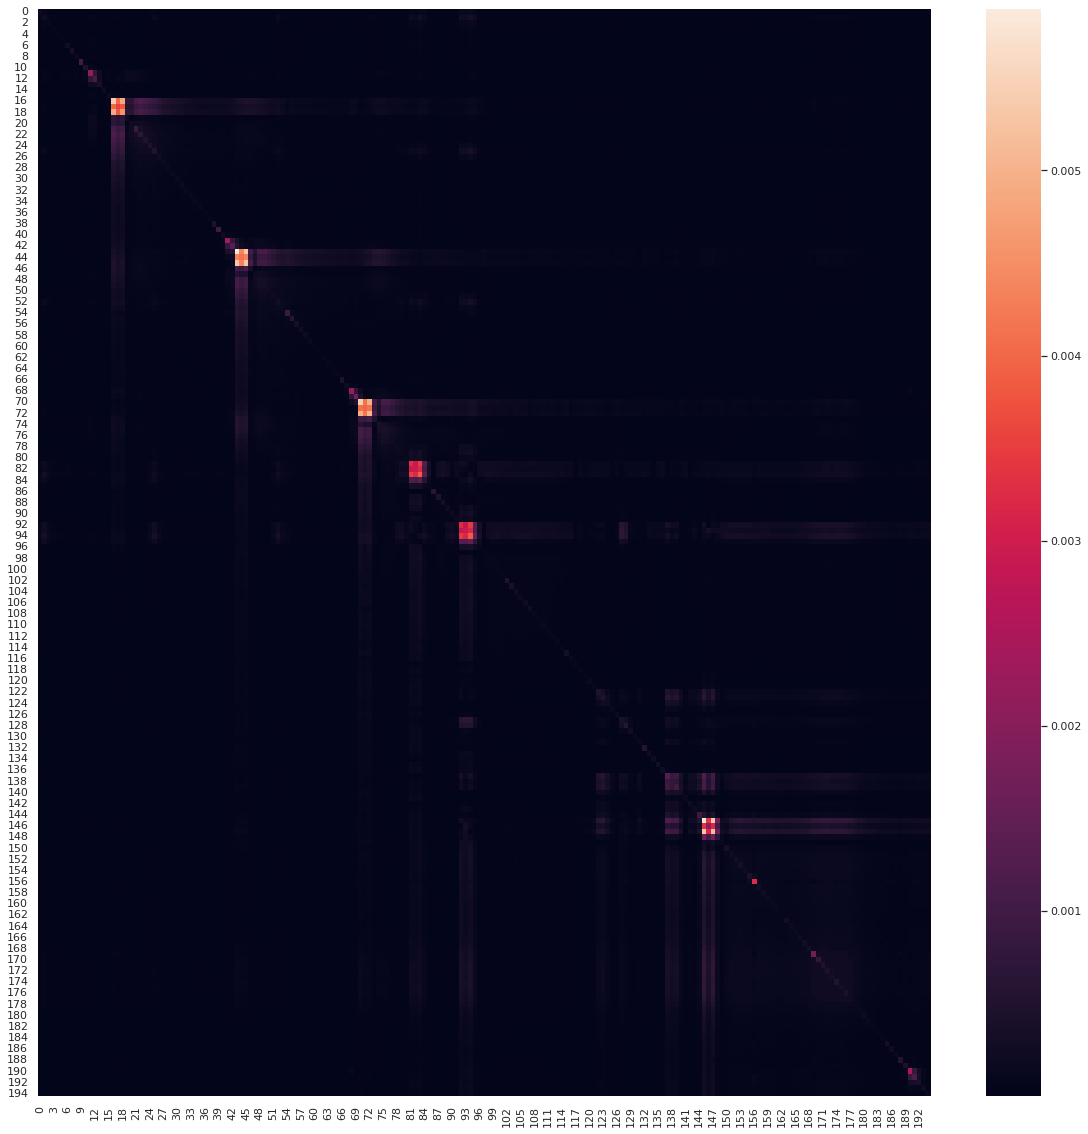

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(np.cov(traces.T[190:385])))
plt.show()

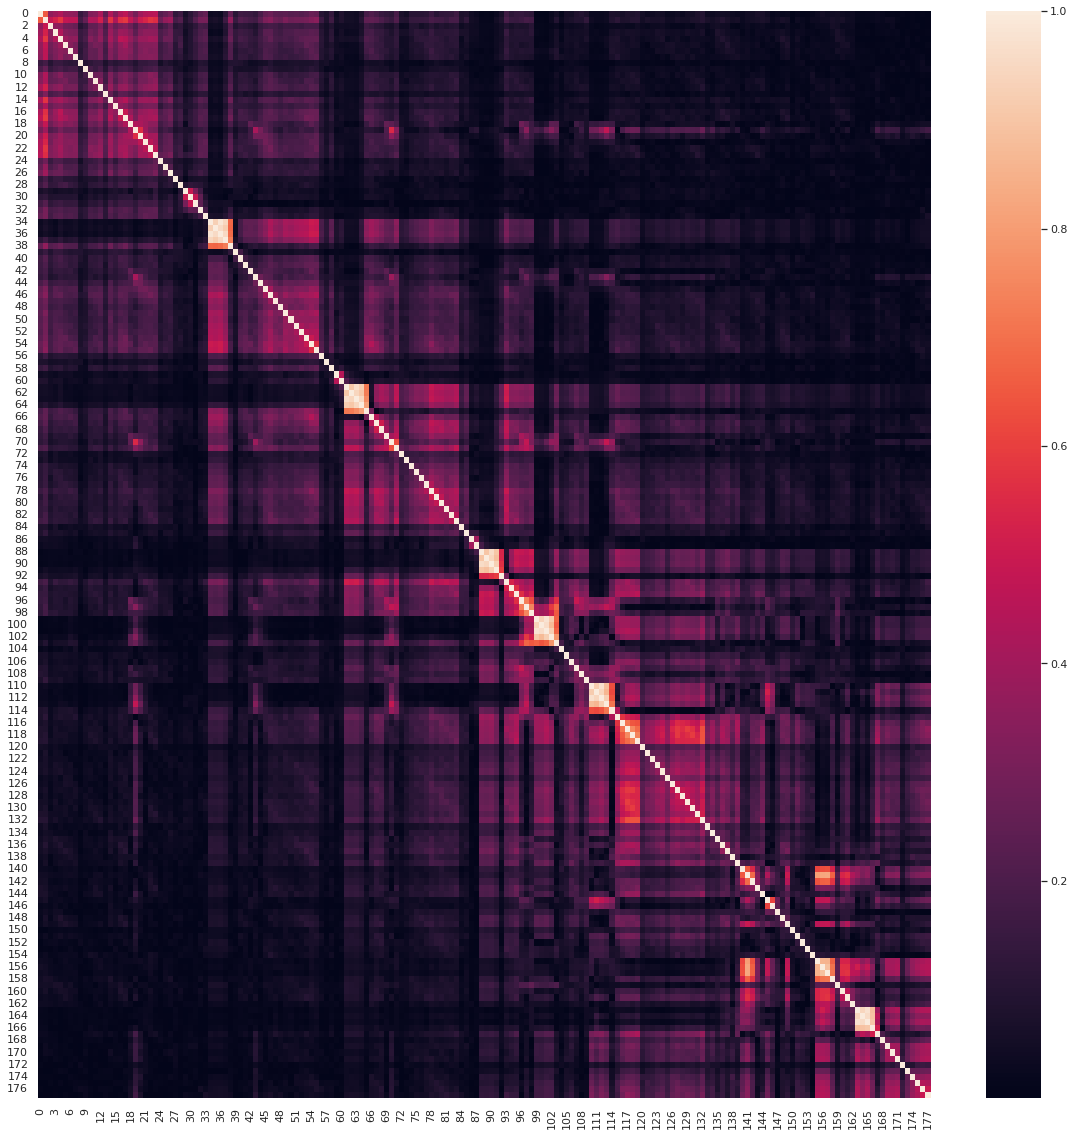

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(np.corrcoef(sig.T)))
plt.show()
# sns.heatmap(np.abs(np.cov(sig.T[:120])))
# plt.show()

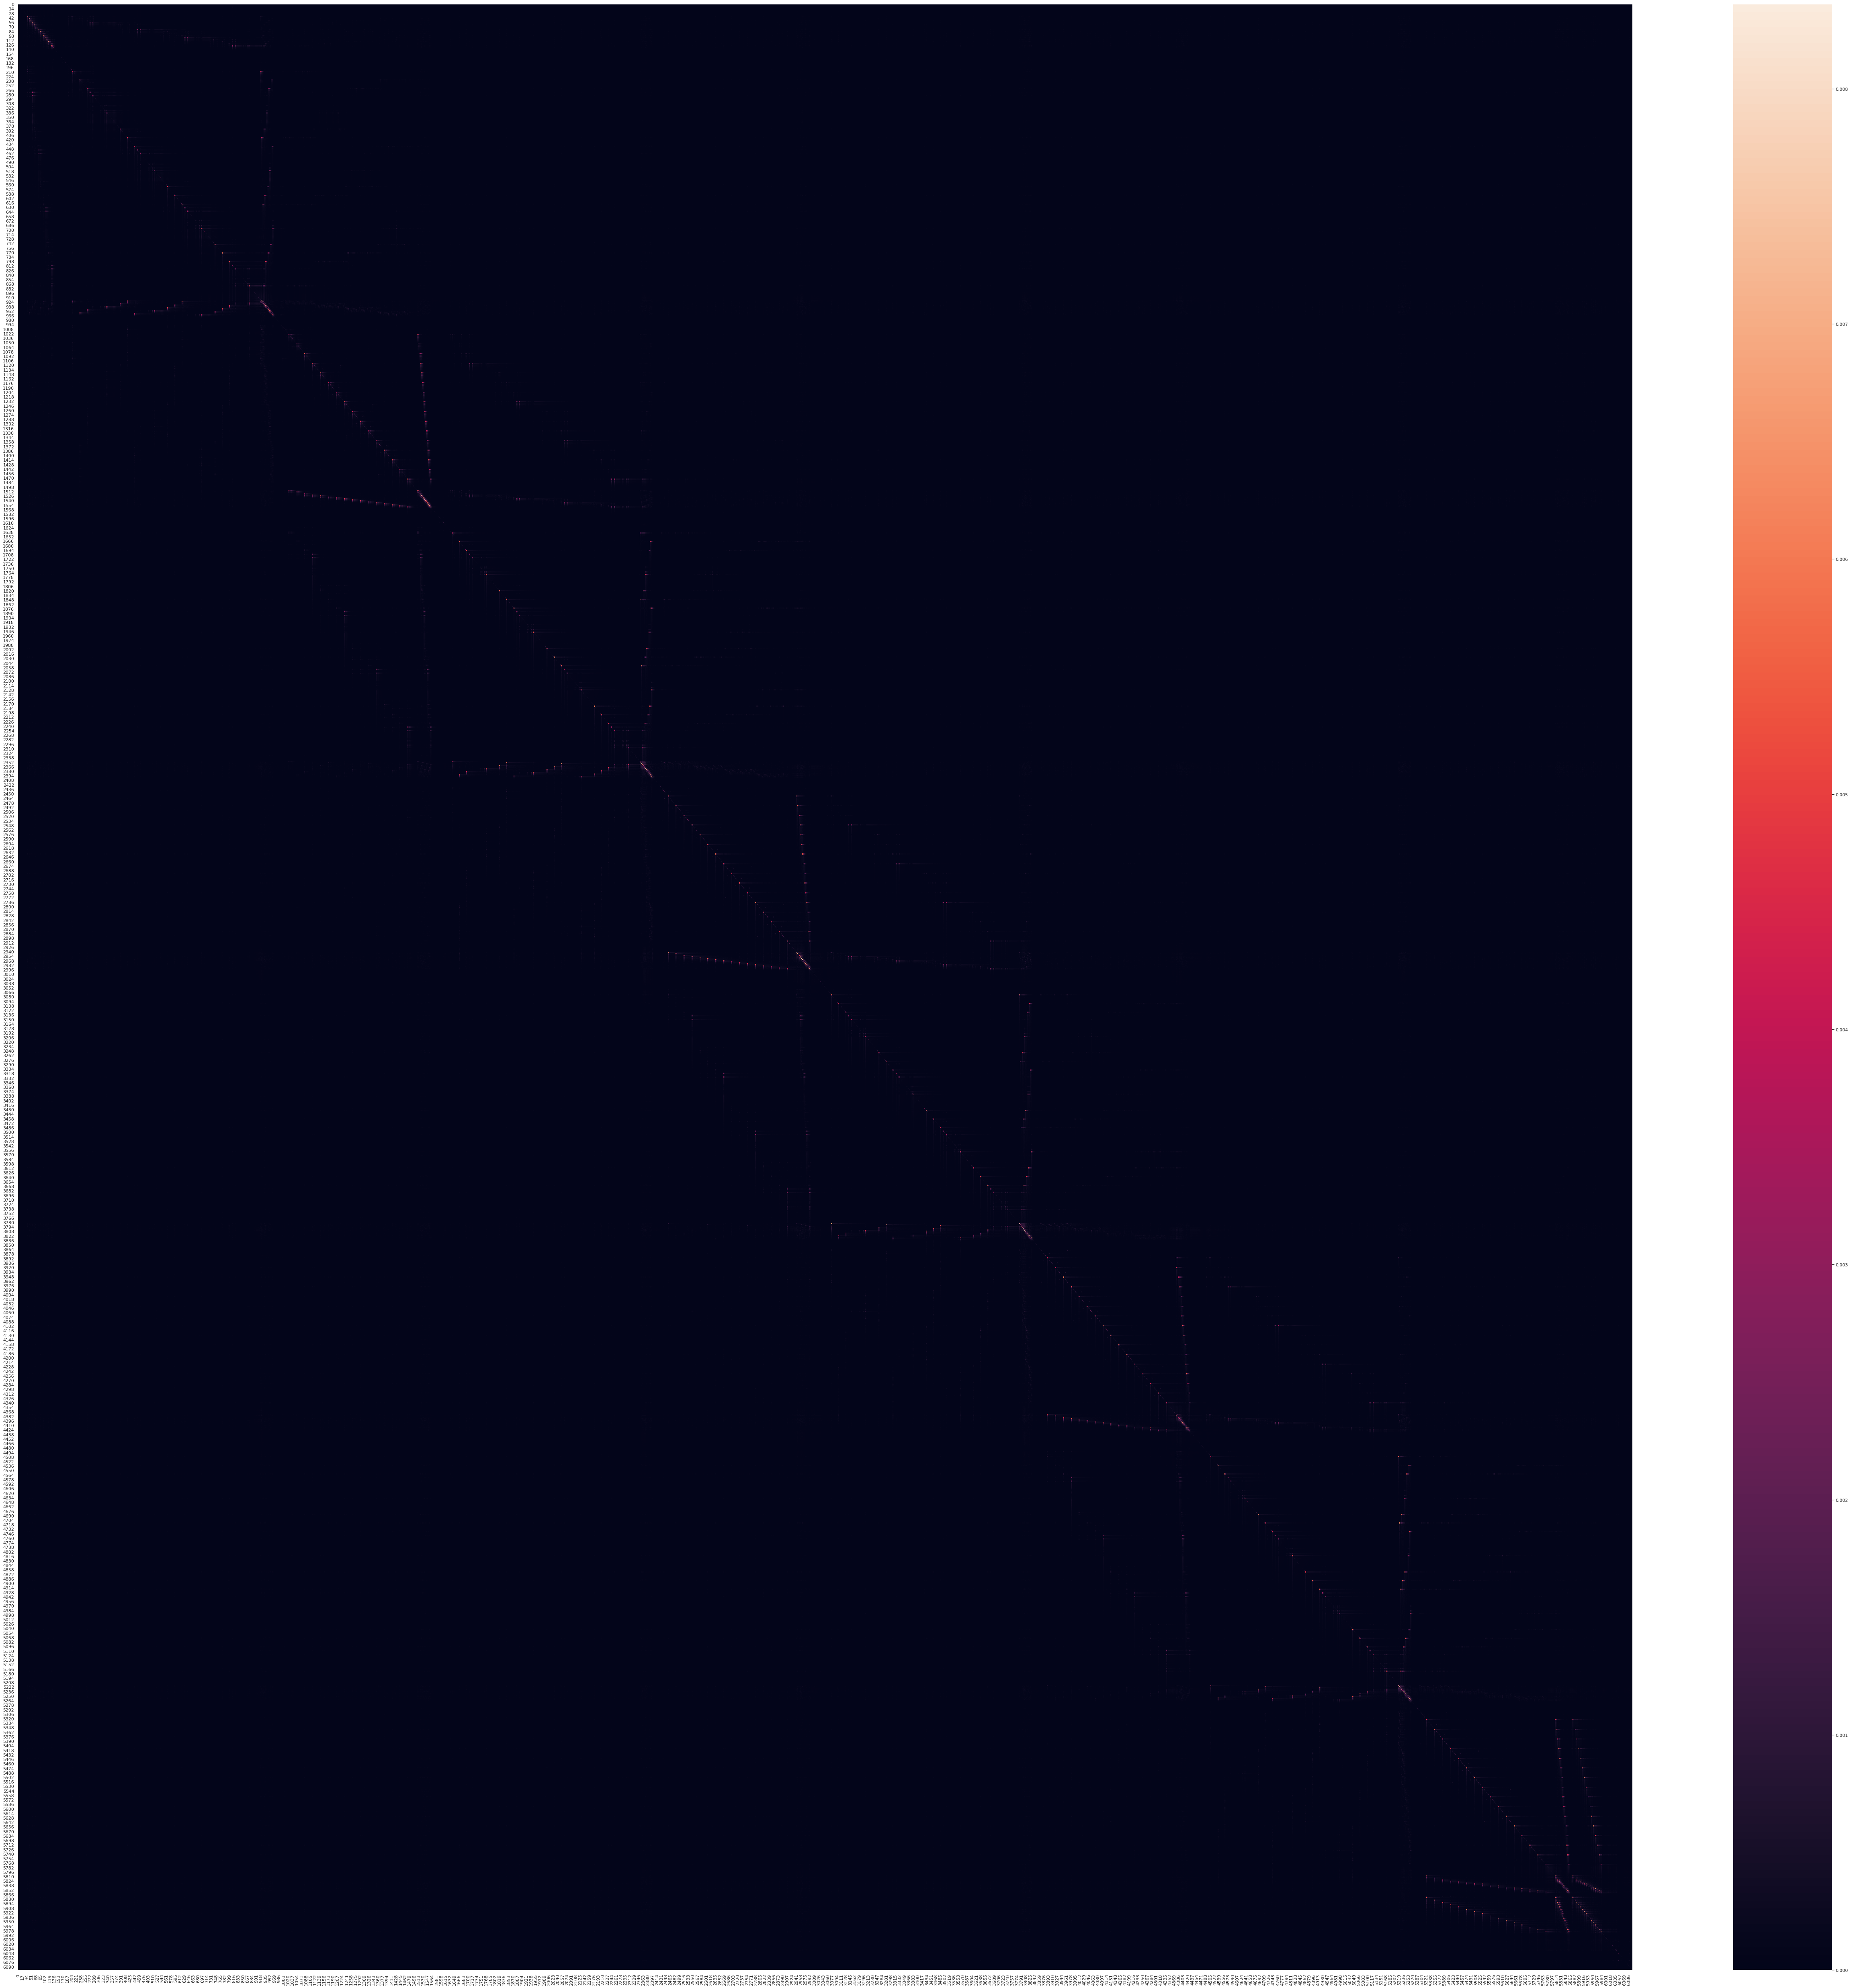

In [39]:
# plt.figure(figsize=(90,90))
# sns.heatmap(np.abs(np.corrcoef(traces.T)))
# plt.show()
plt.figure(figsize=(90,90))
sns.heatmap(np.abs(np.cov(traces.T)))
plt.show()

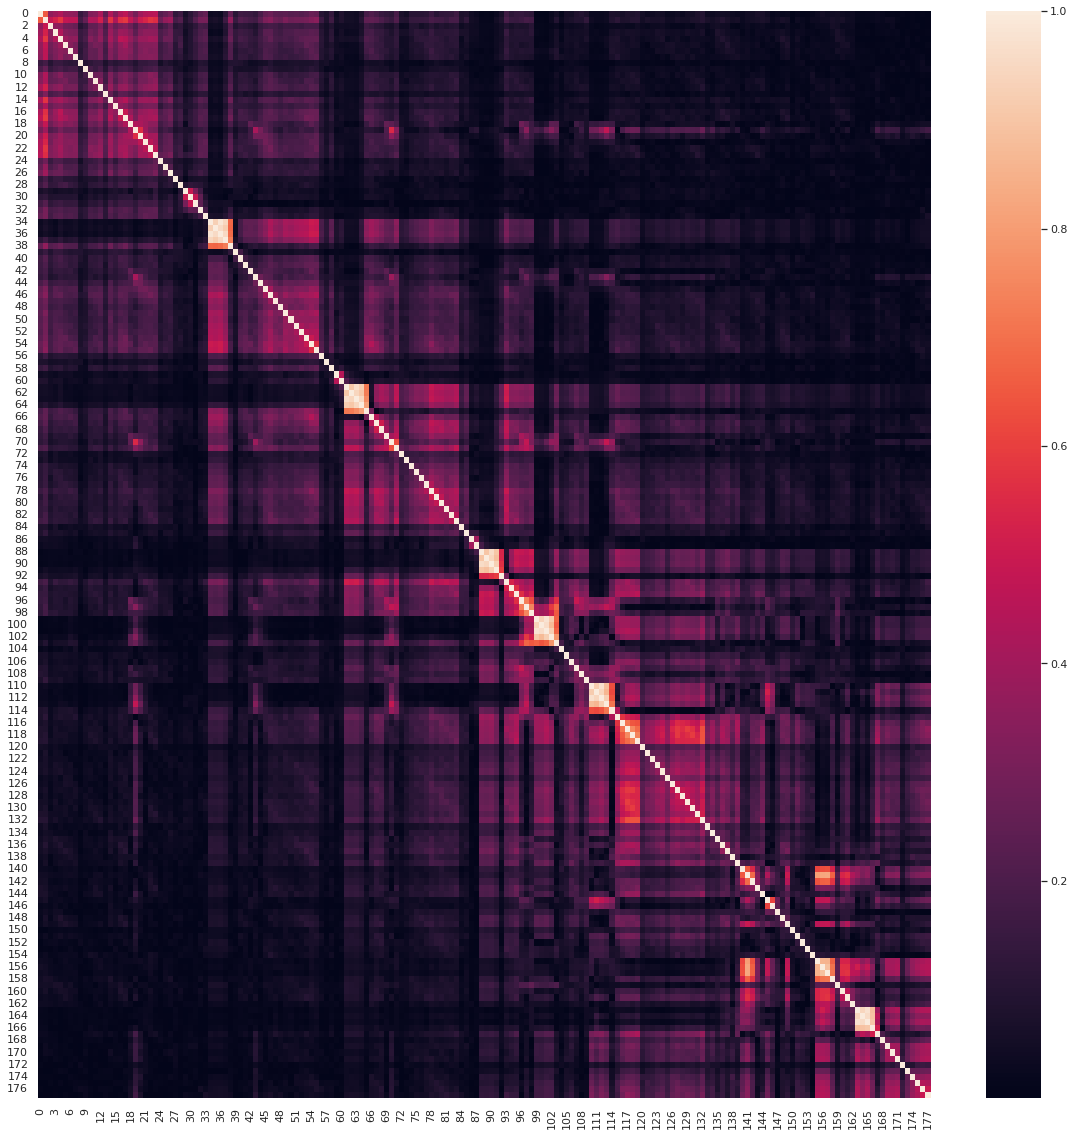

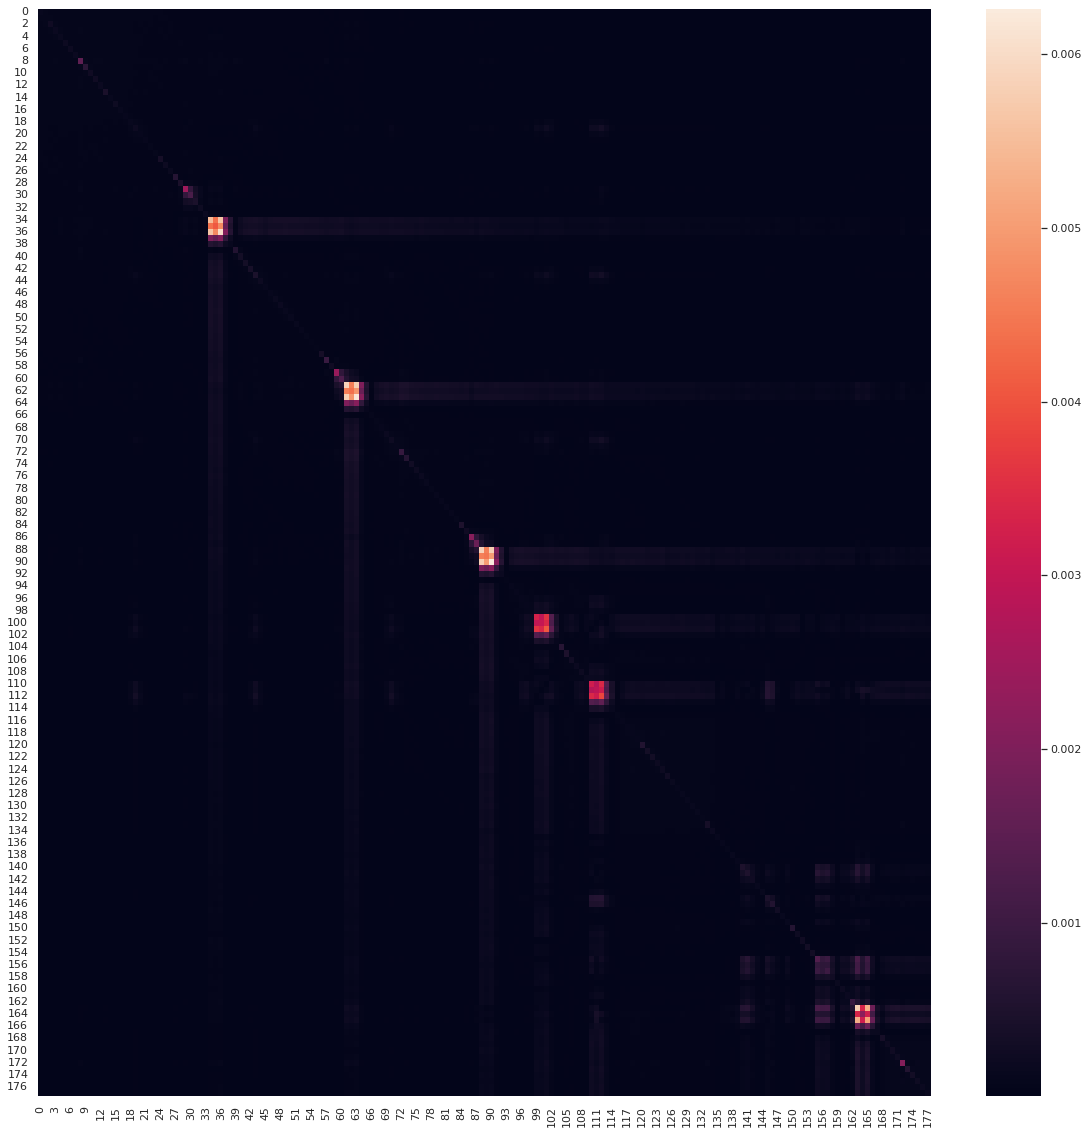

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(np.corrcoef(sig.T)))
plt.show()
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(np.cov(sig.T)))
plt.show()

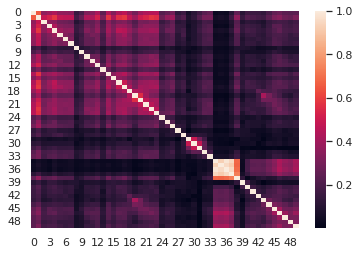

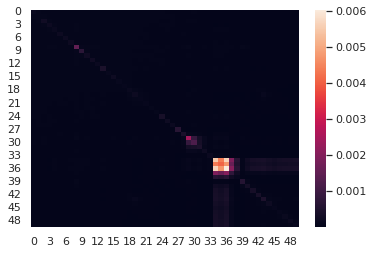

In [21]:
sns.heatmap(np.abs(np.corrcoef(sig.T[:50])))
plt.show()
sns.heatmap(np.abs(np.cov(sig.T[:50])))
plt.show()